**L071_K_means_ex_blobs.ipynb**

2024 JUN 10

Tershire

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# data

In [22]:
from sklearn.datasets import make_blobs

In [23]:
X, Y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print("X.shape:", X.shape, "Y.shape:", Y.shape)

unique_targets, target_counts = np.unique(Y, return_counts=True)
print("unique_targets:", unique_targets)
print("target_counts:", target_counts)

X.shape: (200, 2) Y.shape: (200,)
unique_targets: [0 1 2]
target_counts: [67 67 66]


In [24]:
dataset_df = pd.DataFrame(data=X, columns=["feature1", "feature2"])
dataset_df["target"] = Y

display(dataset_df.head(3))

,feature1,feature2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


## visualization

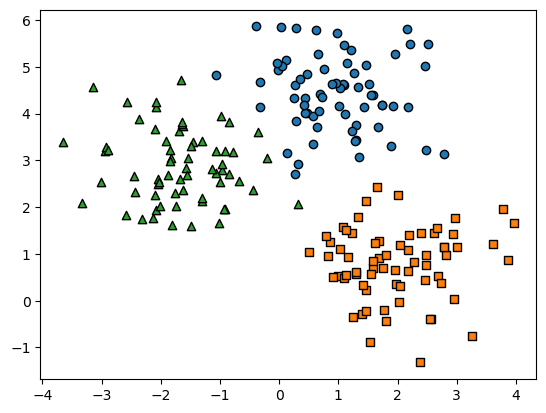

In [25]:
unique_targets = np.unique(Y)

markers = ['o', 's', '^']
for target in unique_targets:
    cluster = dataset_df[dataset_df["target"]==target]
    plt.scatter(x=cluster["feature1"], y=cluster["feature2"],
               edgecolors='k', marker=markers[target])
plt.show()

**another method**

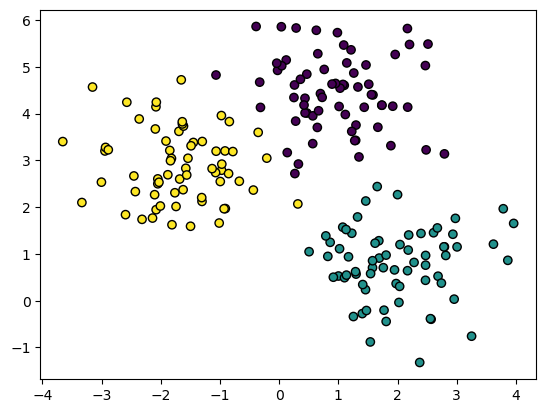

In [26]:
plt.scatter(x=dataset_df["feature1"], y=dataset_df["feature2"], edgecolors='k', c=Y)

# model

In [27]:
from sklearn.cluster import KMeans

In [35]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=200, random_state=0)

# training

In [36]:
cluster_ids = kmeans.fit_predict(dataset_df)

# analysis

In [37]:
dataset_df["cluster_id"] = cluster_ids

# or
# dataset_df["cluster"] = kmeans.labels_

In [38]:
cluster_centers = kmeans.cluster_centers_
unique_cluster_ids = np.unique(cluster_ids)

In [39]:
clustering_result = dataset_df.groupby(["target", "cluster_id"])["feature1"].count()
print(clustering_result)

target  cluster_id
0       2             67
1       0             67
2       1             66
Name: feature1, dtype: int64


## visualization

### clustering result

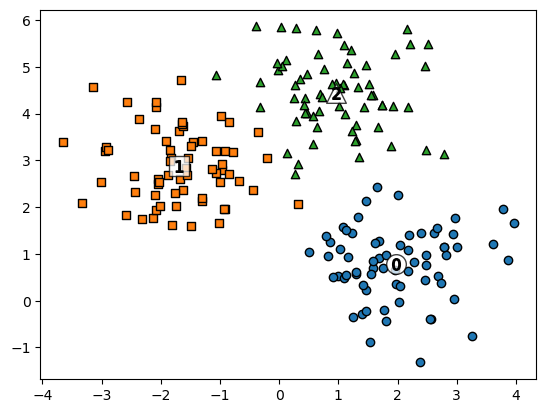

In [40]:
markers = ['o', 's', '^']
for cluster_id in unique_cluster_ids:
    cluster = dataset_df[dataset_df["cluster_id"]==cluster_id]
    plt.scatter(x=cluster["feature1"], y=cluster["feature2"],
                edgecolors='k', marker=markers[cluster_id])

for i, cluster_center in enumerate(cluster_centers):
    # shape
    plt.scatter(x=cluster_center[0], y=cluster_center[1],
                s=200, color="white", alpha=0.75,
                edgecolors='k', marker=markers[i])
    # text
    plt.scatter(x=cluster_center[0], y=cluster_center[1],
                s=70, color='k',
                edgecolors='k', marker="$%d$" % i)

plt.show()

### original data

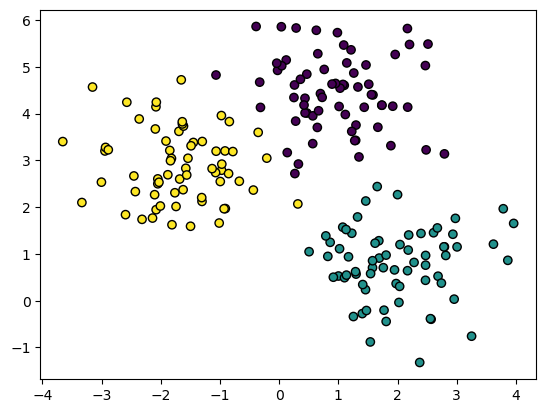

In [41]:
plt.scatter(x=dataset_df["feature1"], y=dataset_df["feature2"], edgecolors='k', c=Y)